In [34]:
import pandas as pd
import math
import matplotlib.pyplot as plt
#matplotlib inline

In [35]:
odom_pos = pd.read_json('../tmp_datas/odom_pos.json')
real_pos = pd.read_json('../tmp_datas/real_pos.json')

In [36]:
print(odom_pos.shape)
print(real_pos.shape)

(5535, 3)
(45492, 3)


In [37]:
odom_pos.head()

,time,x,y
0,116077000000,0.000013,1.583659e-10
1,116083000000,0.000013,1.583659e-10
2,116103000000,0.000013,1.583659e-10
3,116111000000,0.000013,1.583659e-10
4,116121000000,0.000013,1.587205e-10


In [38]:
odom_pos.tail()

,time,x,y
5530,161439000000,9.514724,-0.283260
5531,161439000000,9.515228,-0.283283
5532,161443000000,9.515228,-0.283283
5533,161461000000,9.515228,-0.283283
5534,161463000000,9.515228,-0.283283


In [39]:
real_pos.head()

,time,x,y
0,115976000000,4.999969,2.299852
1,115976000000,4.999969,2.299852
2,115976000000,4.999969,2.299852
3,115976000000,4.999969,2.299852
4,115977000000,4.999969,2.299852


In [40]:
real_pos.tail()

,time,x,y
45487,161460000000,-4.413872,2.426765
45488,161461000000,-4.413872,2.426765
45489,161462000000,-4.413872,2.426765
45490,161463000000,-4.413872,2.426765
45491,161464000000,-4.413872,2.426765


In [41]:
threshold = 3000000

tmp_list = []
for idx, row in odom_pos.iterrows():
    min_t = row['time'] - threshold
    max_t = row['time'] + threshold
#     print(real_pos[])
    df = real_pos[(real_pos['time']>min_t) & (real_pos['time']<max_t)].copy()
    real_xy = df[["x", "y"]].mean()
    tmp_list.append({
        "time": row['time'],
        "odom_x": row['x'],
        "odom_y": row['y'],
        "real_x": 5 - real_xy.x,
        "real_y": 2.3 - real_xy.y,
    })
df_odom_And_real = pd.DataFrame(tmp_list)
df_odom_And_real.head()

,odom_x,odom_y,real_x,real_y,time
0,0.000013,1.583659e-10,0.000031,0.000149,1.160770e+11
1,0.000013,1.583659e-10,0.000031,0.000149,1.160830e+11
2,0.000013,1.583659e-10,0.000031,0.000149,1.161030e+11
3,0.000013,1.583659e-10,0.000031,0.000149,1.161110e+11
4,0.000013,1.587205e-10,0.000031,0.000149,1.161210e+11


In [42]:
df_odom_And_real.tail()

,odom_x,odom_y,real_x,real_y,time
5530,9.514724,-0.283260,9.413873,-0.126765,1.614390e+11
5531,9.515228,-0.283283,9.413873,-0.126765,1.614390e+11
5532,9.515228,-0.283283,9.413873,-0.126765,1.614430e+11
5533,9.515228,-0.283283,9.413872,-0.126765,1.614610e+11
5534,9.515228,-0.283283,9.413872,-0.126765,1.614630e+11


In [43]:
x_mean_delta = (df_odom_And_real['odom_x']-df_odom_And_real['real_x']).abs().mean()
y_mean_delta = (df_odom_And_real['odom_y']-df_odom_And_real['real_y']).abs().mean()

error = math.sqrt(x_mean_delta**2 + y_mean_delta**2)
print(error)

0.12134494037690795


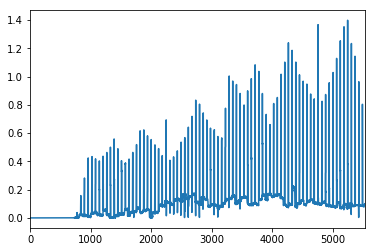

In [44]:
df = (df_odom_And_real['odom_x']-df_odom_And_real['real_x']).abs()
df.plot()

In [79]:
df_odom_And_real.head(100)

,odom_x,odom_y,real_x,real_y,time
510,0.101513,0.032100,0.113995,0.023770,1.338210e+11
511,0.101513,0.032100,0.115092,0.024018,1.338250e+11
512,0.101513,0.032100,0.118646,0.024816,1.338380e+11
513,0.101513,0.032100,0.124037,0.026006,1.338580e+11
514,0.106999,0.033281,0.125891,0.026410,1.338650e+11
515,0.112401,0.034422,0.125891,0.026410,1.338650e+11
516,0.112401,0.034422,0.128767,0.027030,1.338760e+11
517,0.112401,0.034422,0.129285,0.027141,1.338780e+11
518,0.112401,0.034422,0.134382,0.028217,1.338980e+11
519,0.117658,0.035511,0.137120,0.028785,1.339090e+11


In [12]:
df_odom_And_real.head()

,odom_x,odom_y,real_x,real_y,time
0,6.789725,1.595471,6.693203,1.713079,1.968370e+11
1,6.789725,1.595471,6.694686,1.714531,1.968560e+11
2,6.789725,1.595471,6.696220,1.716037,1.968760e+11
3,6.789725,1.595471,6.696451,1.716265,1.968790e+11
4,6.791308,1.596979,6.696529,1.716341,1.968800e+11


In [28]:
past_pos = []
past_time = 0

delta_trans_list = []
delta_time_list = []

for idx, row in df_odom_And_real.iterrows():
    if past_pos == []:
        past_pos = [row['real_x'], row['real_y']]
        past_time = row['time']
        delta_trans_list.append(None)
        delta_time_list.append(None)
        continue
    dx = row['real_x'] - past_pos[0]
    dy = row['real_y'] - past_pos[1]
    delta_trans = math.sqrt(dx**2+dy**2)
    delta_trans_list.append(delta_trans)
    delta_time = row['time'] - past_time
    delta_time_list.append(delta_time)
df_odom_And_real['delta_trans'] = delta_trans_list
df_odom_And_real['delta_time'] = delta_time_list

In [29]:
df_odom_And_real.head()

,odom_x,odom_y,real_x,real_y,time,delta_trans,delta_time
0,6.789725,1.595471,6.693203,1.713079,1.968370e+11,0.000000,1.0
1,6.789725,1.595471,6.694686,1.714531,1.968560e+11,0.002076,19000000.0
2,6.789725,1.595471,6.696220,1.716037,1.968760e+11,0.004226,39000000.0
3,6.789725,1.595471,6.696451,1.716265,1.968790e+11,0.004550,42000000.0
4,6.791308,1.596979,6.696529,1.716341,1.968800e+11,0.004659,43000000.0


In [30]:
df_odom_And_real['vel.'] = df_odom_And_real['delta_trans'] / (df_odom_And_real['delta_time']/10**9)

In [32]:
df_odom_And_real.head()

,odom_x,odom_y,real_x,real_y,time,delta_trans,delta_time,vel.
0,6.789725,1.595471,6.693203,1.713079,1.968370e+11,0.000000,1.0,0.000000
1,6.789725,1.595471,6.694686,1.714531,1.968560e+11,0.002076,19000000.0,0.109244
2,6.789725,1.595471,6.696220,1.716037,1.968760e+11,0.004226,39000000.0,0.108355
3,6.789725,1.595471,6.696451,1.716265,1.968790e+11,0.004550,42000000.0,0.108339
4,6.791308,1.596979,6.696529,1.716341,1.968800e+11,0.004659,43000000.0,0.108340


In [38]:
df = pd.DataFrame({
    'error': df,
    'vel.': df_odom_And_real['vel.']
})

In [43]:
df.head()

,error,vel.
0,0.0965222,0.000000
1,0.0950386,0.109244
2,0.0935047,0.108355
3,0.0932735,0.108339
4,0.0947797,0.108340


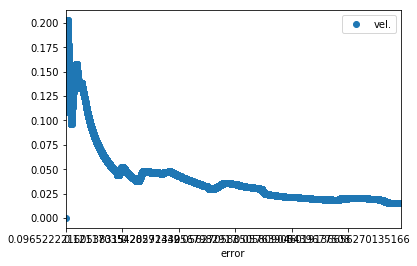

In [47]:
df.plot(x='error', y='vel.', style='o')